In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import seaborn as sns

In [2]:
def get_folder_contents(path):
    contents = [
        path+f for f in os.listdir(path)
        if f != '.DS_Store'
    ]
    return contents

img_paths = list()
data_loc = '../data/train/'
folders = get_folder_contents(data_loc)
for folder in folders:
    img_paths += get_folder_contents(folder+'/')


In [3]:
images = [
    np.asarray(Image.open(img))
    for img in img_paths
]

df_sizes = pd.DataFrame([img.shape for img in images])
df_sizes.columns = ['height', 'width', 'channels']

multi_channel_selector = df_sizes['channels'] == 3
multi_channel_images = df_sizes[multi_channel_selector].index

for img_index in multi_channel_images:
    same_pixels = np.logical_or(
        images[img_index][:,:,0] == images[img_index][:,:,1],
        images[img_index][:,:,1] == images[img_index][:,:,2]
    ).sum()
    img_size = images[img_index].shape[0] * images[img_index].shape[1]
    if same_pixels == img_size:
        images[img_index] = images[img_index][:,:,0]


'../data/train/PNEUMONIA/person1722_bacteria_4547.jpeg'

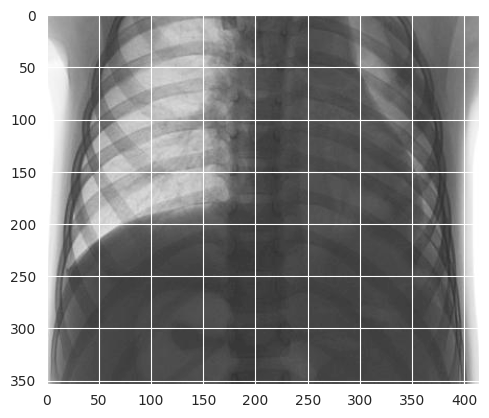

In [4]:
# test_img = np.asarray(Image.open(normal_data_loc+img_list[42]))
def show_image(np_array):
    if np_array.ndim == 3:
        plt.imshow(np_array,
                   vmin=0,
                   vmax=255)
    plt.imshow(np_array,
               cmap='gray_r',
               vmin=0,
               vmax=255)
    

show_image(images[1666])
img_paths[1666]

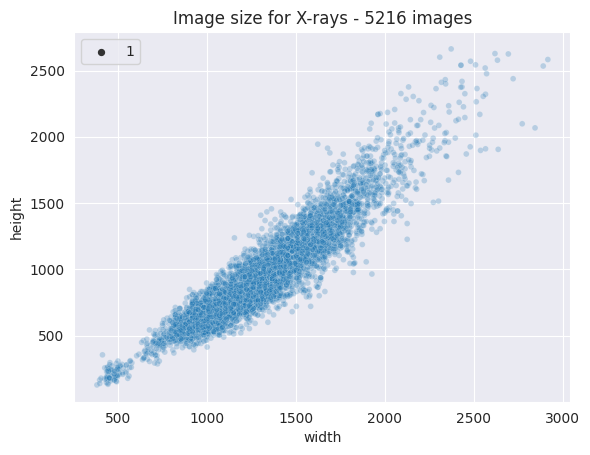

In [5]:
df_sizes = pd.DataFrame([img.shape for img in images])
df_sizes.columns = ['height', 'width']
g = sns.scatterplot(
    data=df_sizes,
    x='width',
    y='height',
    size=1,
    alpha=0.25
)
g.set(
    title='Image size for X-rays - {} images'.format(df_sizes.shape[0]),
);

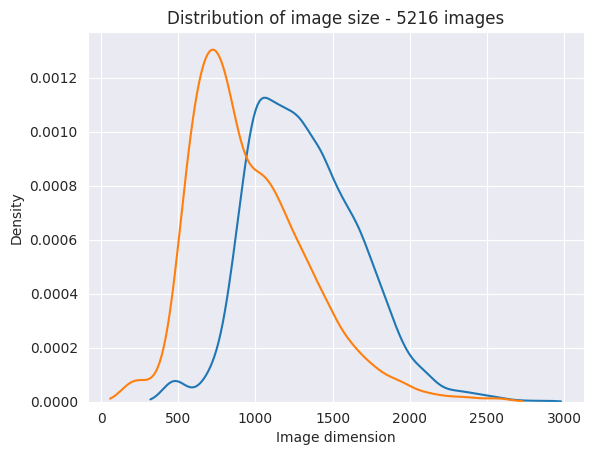

In [6]:
g = sns.kdeplot(
    data=df_sizes,
    x='width',
    cut=True,
)
sns.kdeplot(
    data=df_sizes,
    x='height',
    cut=True,
    ax=g,
)

g.set(
    title='Distribution of image size - {} images'.format(df_sizes.shape[0]),
    xlabel='Image dimension'
);

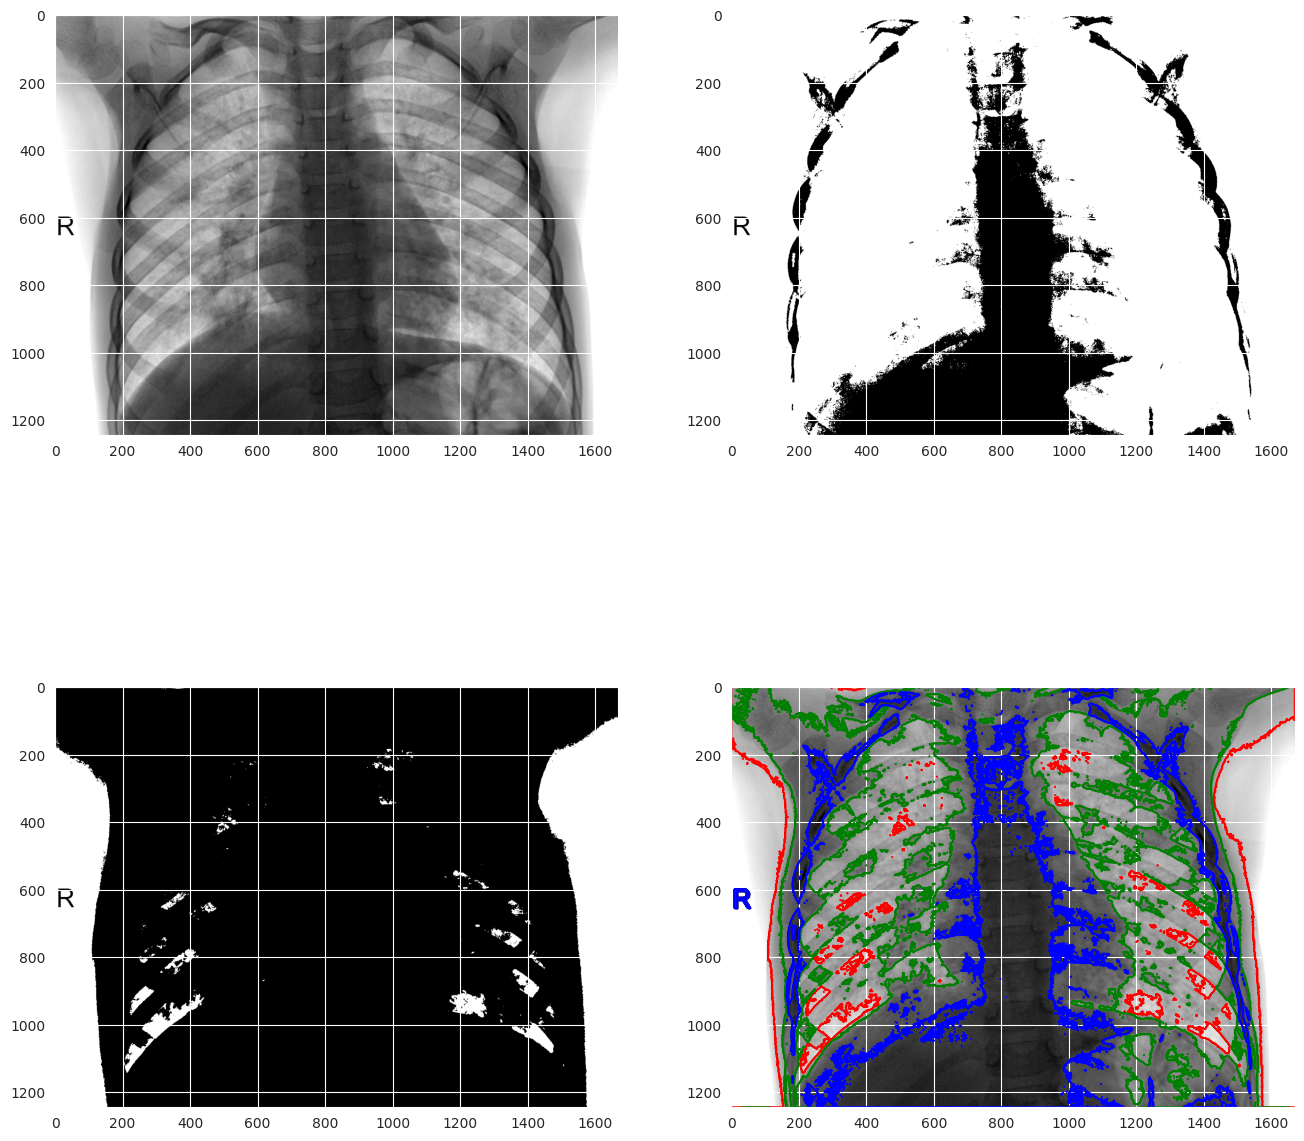

In [26]:
img = images[4896]

# https://stackoverflow.com/questions/29434533/edge-detection-for-image-stored-in-matrix
    
thresh1 = 65
thresh2 = 125
thresh3 = 185
region1 = thresh1<img
region2 = thresh2<img
region3 = thresh3<img
n_region1 = ~ region1
n_region2 = ~ region2
n_region3 = ~ region3

fig, axs = plt.subplots(2,2, figsize=(16,16))
axs[0,0].imshow(img, cmap='gray_r')
axs[0,1].imshow(region3, cmap='gray_r')
axs[1,0].imshow(region1, cmap='gray_r')

shift = -1
edgex1 = (region1 ^ np.roll(n_region1, shift=shift, axis=0))
edgey1 = (region1 ^ np.roll(n_region1, shift=shift, axis=1))
edgex2 = (region2 ^ np.roll(n_region2, shift=shift, axis=0)) 
edgey2 = (region2 ^ np.roll(n_region2, shift=shift, axis=1))
edgex3 = (region3 ^ np.roll(n_region3, shift=shift, axis=0)) 
edgey3 = (region3 ^ np.roll(n_region3, shift=shift, axis=1))

#Plot location of edge over image
axs[1,1].imshow(img, cmap='gray_r')
axs[1,1].contour(edgex1,1,colors='r',linewidths=1.)
axs[1,1].contour(edgey1,1,colors='r',linewidths=1.)
axs[1,1].contour(edgex2,1,colors='g',linewidths=1.)
axs[1,1].contour(edgey2,1,colors='g',linewidths=1.)
axs[1,1].contour(edgex3,1,colors='b',linewidths=1.)
axs[1,1].contour(edgey3,1,colors='b',linewidths=1.)


In [9]:
avg_color = [np.mean(img) for img in images]

<Axes: ylabel='Density'>

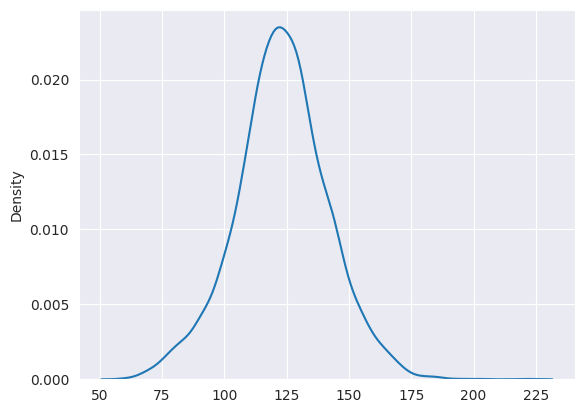

In [11]:
sns.kdeplot(avg_color)